In [2]:
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
# import Image
import matplotlib.image as mpimg
# from PIL import Image
# import cv2
encoding_dim = 1200
encoding_dim2 = 1500


Using Theano backend.


In [3]:
input_image = Input(shape=(1024,))
encoded = Dense(encoding_dim,activation='relu')(input_image)
encoded2 = Dense(encoding_dim2, activation='relu')(encoded)
decoded2 = Dense(encoding_dim,activation='relu')(encoded2)
decoded = Dense(1024, activation='relu')(decoded2)

In [4]:
autoencoder = Model(input=input_image, output= decoded)


In [5]:
autoencoder.compile(optimizer='adadelta', loss = 'mse' , metrics = ['mse'])

In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [7]:
print(x_test.shape)
x_train2 = 0.299*x_train[:,0,0:32,0:32] + 0.587*x_train[:,1,0:32,0:32] + 0.114*x_train[:,2,0:32,0:32]
x_test2 = 0.299*x_test[:,0,0:32,0:32] + 0.587*x_test[:,1,0:32,0:32] + 0.114*x_test[:,2,0:32,0:32]
# x_train2 = Image.convert(x_train,'L')

(10000, 3, 32, 32)


In [8]:
print(x_train2.shape)
# plt.imshow(x_train2[1,:,:], cmap= plt.get_cmap('gray'))
# plt.imshow(x_train2[1,:,:])
# plt.show()


(50000, 32, 32)


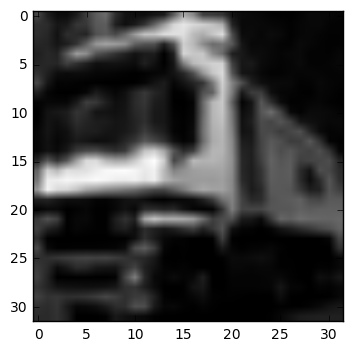

In [9]:
x_train2 = x_train2.astype('float')
imaged_x_train = 255*(x_train2/255)**(1/0.3)
plt.imshow(imaged_x_train[1,:,:],cmap=plt.get_cmap('gray'))
plt.show()
x_test2 = x_test2.astype('float')
imaged_x_test = 255*(x_test2/255)**(1/0.3)

In [10]:
# imaged_x_train = x_train2*(0.5)
# imaged_x_train = 255*(x_train2/255)^(1/2.2)
# print(imaged_x)
# print(imaged_x.shape)
# plt.imshow(imaged_x[1,:,:],cmap= plt.get_cmap('gray'))
# plt.show()
x_train3 = np.reshape(x_train2,(50000,1024))
# x_train3 = np.transpose(x_train3)
x_test3 = np.reshape(x_test2,(10000,1024))
# x_test3 = np.transpose(x_test3)
imaged_x_reshape_train = np.reshape(imaged_x_train,(50000,1024))
# imaged_x_reshape_train = np.transpose(imaged_x_reshape_train)
print np.shape(imaged_x_reshape_train)
# imaged_x_test = x_test2*(0.5)
imaged_x_reshape_test = np.reshape(imaged_x_test,(10000,1024))
# imaged_x_reshape_test = np.transpose(imaged_x_reshape_test)
print(np.shape(imaged_x_reshape_train))
print(np.shape(x_train3))
print(np.shape(imaged_x_reshape_test))
print(np.shape(x_test3))
# imaged

(50000, 1024)
(50000, 1024)
(50000, 1024)
(10000, 1024)
(10000, 1024)


In [11]:
x_train3 = x_train3.astype('float')/ 255
x_test3 = x_test3.astype('float')/255
imaged_x_reshape_train = imaged_x_reshape_train.astype('float')/255
imaged_x_reshape_test = imaged_x_reshape_test.astype('float')/255

In [12]:
autoencoder.fit(imaged_x_reshape_train,x_train3,nb_epoch=50, batch_size=256, shuffle=True, validation_data=(imaged_x_reshape_train,x_train3))

Train on 50000 samples, validate on 50000 samples
Epoch 1/50
50000/50000 [==============================] - 43s - loss: 0.1080 - mean_squared_error: 0.1080 - val_loss: 0.0853 - val_mean_squared_error: 0.0853
Epoch 2/50
50000/50000 [==============================] - 42s - loss: 0.0766 - mean_squared_error: 0.0766 - val_loss: 0.0690 - val_mean_squared_error: 0.0690
Epoch 3/50
50000/50000 [==============================] - 43s - loss: 0.0645 - mean_squared_error: 0.0645 - val_loss: 0.0596 - val_mean_squared_error: 0.0596
Epoch 4/50
50000/50000 [==============================] - 42s - loss: 0.0567 - mean_squared_error: 0.0567 - val_loss: 0.0548 - val_mean_squared_error: 0.0548
Epoch 5/50
50000/50000 [==============================] - 43s - loss: 0.0525 - mean_squared_error: 0.0525 - val_loss: 0.0500 - val_mean_squared_error: 0.0500
Epoch 6/50
50000/50000 [==============================] - 43s - loss: 0.0489 - mean_squared_error: 0.0489 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Ep

In [13]:
reconstructedImage = autoencoder.predict(imaged_x_reshape_test)

In [14]:
mse = ((reconstructedImage - x_test3)**2).mean(axis= None)
print mse

0.0265061341067


(10000, 1024)
(10000, 1024)


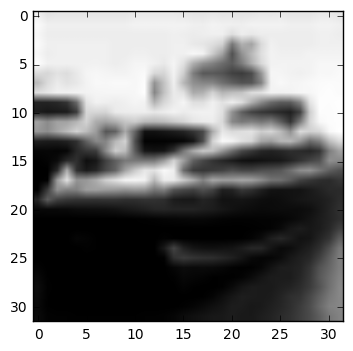

In [15]:
print(np.shape(imaged_x_reshape_test))
print(np.shape(reconstructedImage))
# a = imaged_x_reshape_test
a = np.reshape(imaged_x_reshape_test,(10000,32,32))*255
# print np.shape(a)
a2 = np.reshape(x_test3,(10000,32,32))
# print np.shape(a2)
a3 = np.reshape(reconstructedImage, (10000,32,32))*255
# print np.shape(a3)
plt.imshow(a[1,:,:],cmap=plt.get_cmap('gray'))
plt.show()
# plt.imshow(np.reshape(imaged_x_reshape_test[1,:,:],(32,32)),cmap=plt.get_cmap('gray'))
# plt.show()

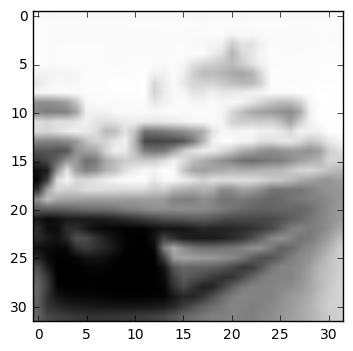

In [16]:
plt.imshow(a2[1,:,:],cmap=plt.get_cmap('gray'))
plt.show()

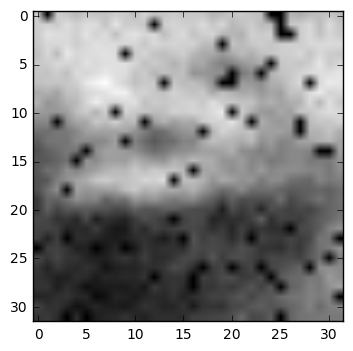

In [17]:
plt.imshow(a3[1,:,:],cmap=plt.get_cmap('gray'))
plt.show()